In [ ]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')

In [ ]:
rawBostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
rawBostonData.dropna(inplace = True)
renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita', 
 ' ZN ':'landOver25K_sqft', 
 'INDUS ':'non-retailLandProptn', 
 'CHAS':'riverDummy', 
 'NOX':'nitrixOxide_pp10m', 
 'RM':'AvgNo.RoomsPerDwelling', 
 'AGE':'ProptnOwnerOccupied', 
 'DIS':'weightedDist', 
 'RAD':'radialHighwaysAccess', 
 'TAX':'propTaxRate_per10K', 
 'PTRATIO':'pupilTeacherRatio', 
 'LSTAT':'pctLowerStatus', 
 'MEDV':'medianValue_Ks'}) 
renamedBostonData.head() 

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25K_sqft        506 non-null    float64
 2   non-retailLandProptn    506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwaysAccess    506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [ ]:
renamedBostonData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

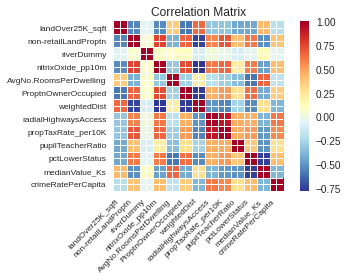

In [ ]:
cm = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(cm, xnames = xnames, ynames = ynames, title = None, normcolor= False, cmap='RdYlBu_r');

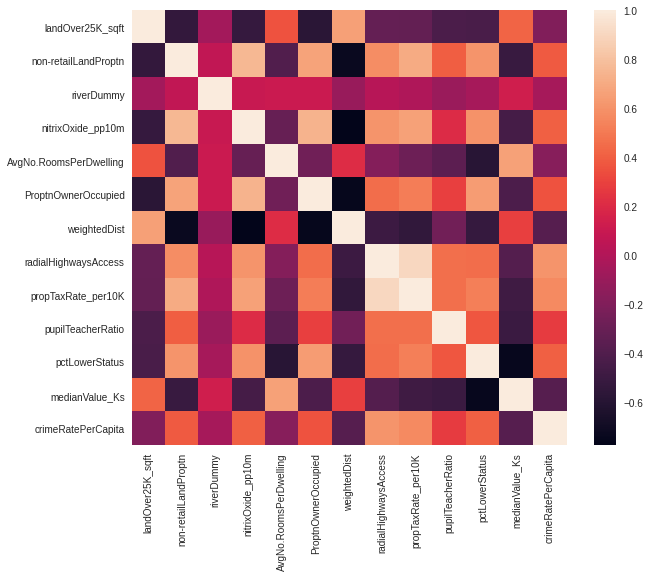

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, square = True, ax = ax);

- there is a strong positive correlation (an increase in one causes an increase in the other) between variables that have orange or red squares
- There is a strong negative correlation (an increase in one causes a decrease in the other) between variables with blue squares. 
- There is little or no correlation between variables with pale-colored squares. 
- For example, there appears to be a relatively strong correlation between nitrixOxide_pp10m and non-retailLandProptn, but a low correlation between riverDummy and any other variable.

In [ ]:
cm

,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
landOver25K_sqft,1.000000,-0.540095,-0.059189,-0.520305,0.355346,-0.577457,0.659340,-0.311920,-0.324172,-0.424612,-0.435827,0.422574,-0.198455
non-retailLandProptn,-0.540095,1.000000,0.065271,0.758178,-0.399166,0.667887,-0.728968,0.580813,0.702973,0.398513,0.607457,-0.508338,0.387471
riverDummy,-0.059189,0.065271,1.000000,0.091469,0.107996,0.106329,-0.098551,0.022731,-0.007864,-0.094255,-0.041110,0.136831,-0.044587
nitrixOxide_pp10m,-0.520305,0.758178,0.091469,1.000000,-0.306510,0.742016,-0.776311,0.606721,0.662164,0.206809,0.603656,-0.453424,0.405813
AvgNo.RoomsPerDwelling,0.355346,-0.399166,0.107996,-0.306510,1.000000,-0.263085,0.215439,-0.183000,-0.280341,-0.350828,-0.586573,0.666761,-0.167258
ProptnOwnerOccupied,-0.577457,0.667887,0.106329,0.742016,-0.263085,1.000000,-0.751059,0.458717,0.515376,0.289976,0.639881,-0.419062,0.355730
weightedDist,0.659340,-0.728968,-0.098551,-0.776311,0.215439,-0.751059,1.000000,-0.494932,-0.543333,-0.259140,-0.522120,0.289658,-0.378997
radialHighwaysAccess,-0.311920,0.580813,0.022731,0.606721,-0.183000,0.458717,-0.494932,1.000000,0.908578,0.462290,0.456592,-0.383132,0.608838
propTaxRate_per10K,-0.324172,0.702973,-0.007864,0.662164,-0.280341,0.515376,-0.543333,0.908578,1.000000,0.462556,0.528029,-0.478903,0.565035
pupilTeacherRatio,-0.424612,0.398513,-0.094255,0.206809,-0.350828,0.289976,-0.259140,0.462290,0.462556,1.000000,0.374842,-0.503692,0.276530


# Graphical Representation of Linear Relationship

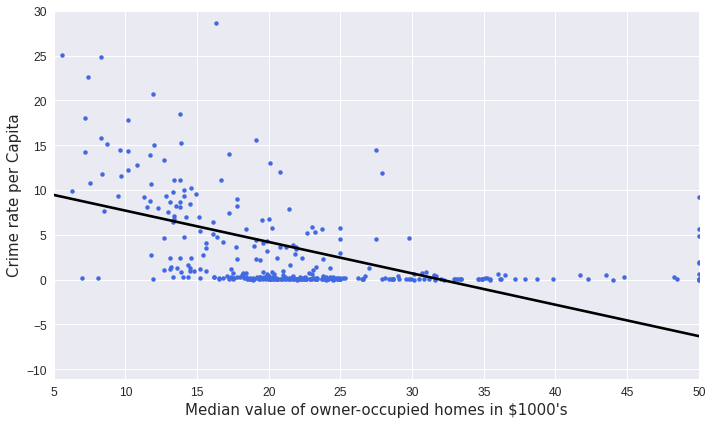

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='medianValue_Ks', y='crimeRatePerCapita', ci=None, data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1});
ax.set_ylabel('Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

# Examining possible log-linear relationship

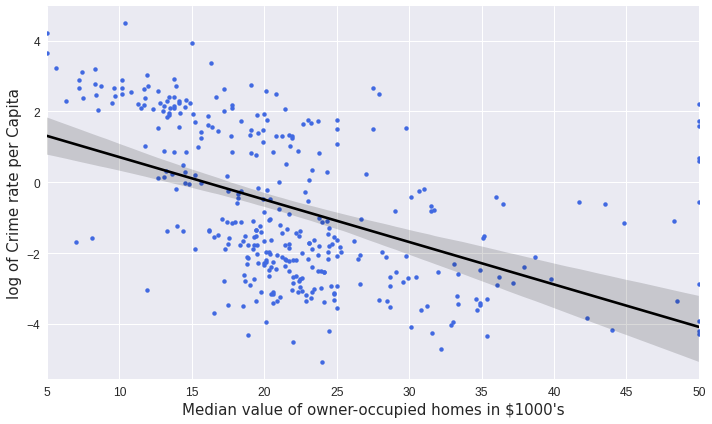

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('log of Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

The regression line created in this activity fits the data better than the previous plot - the regression line in the log graph more clearly matches the spread of the data points. We have solved the issue where the bottom third of the line had no points clustered around it. This was achieved by transforming the dependent variable with the logarithm function. The transformed dependent variable (log of crime rate per capita) has an improved linear relationship with the median value of owner-occupied homes than the untransformed variable.

examine a simple linear regression model where the crime rate per capita is the dependent variable and the median value of owner-occupied homes is the independent variable. We use the statsmodels formula API to create a linear regression model for Python to analyze.

we call the ols function of the statsmodels API and set its formula argument by defining a **patsy formula string** that uses the **tilde (~) symbol to relate the dependent variable to the independent variable**, tell the function where to find the variables named, in the string, by assigning the data argument of the ols function to the DataFrame that contains your variables (train_data).

In [ ]:
linearModel = smf.ols(formula='crimeRatePerCapita ~ medianValue_Ks', data=train_data)
linearModelResult = linearModel.fit() #estimate the regression coefficients (parameters) using the ordinary least squares method.
print(linearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     59.02
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.56e-13
Time:                        13:31:30   Log-Likelihood:                -1217.4
No. Observations:                 354   AIC:                             2439.
Df Residuals:                     352   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2094      1.079     10.

The .fit method provides many functions to explore its output. These include the conf_int(), pvalues, tvalues, and summary() parameters. With these functions, the parameters of the model, the confidence intervals, and the p-values and t-values for the analysis can be retrieved from the results.   
The syntax simply involves following the dot notation, after the variable name containing the results, with the relevant function name – for example, linearModelResult.conf_int() will output the confidence interval values. The handiest of them all is the summary() function, which presents a table of all relevant results from the analysis.

# Fitting a Log-Linear Model Using statsmodels API

In [ ]:
logLinearModel = smf.ols(formula = 'np.log(crimeRatePerCapita) ~ medianValue_Ks', data = train_data)
logLinearModelResult = logLinearModel.fit()
print(logLinearModelResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.238
Model:                                    OLS   Adj. R-squared:                  0.236
Method:                         Least Squares   F-statistic:                     109.9
Date:                        Thu, 23 Jul 2020   Prob (F-statistic):           1.48e-22
Time:                                13:53:02   Log-Likelihood:                -727.67
No. Observations:                         354   AIC:                             1459.
Df Residuals:                             352   BIC:                             1467.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

# Fitting a Multiple Linear Regression Model Using the Statsmodels formula API
using the plus operator (+) in the patsy formula string to define a linear regression model that includes more than one independent variable.
- Notice improvement in the adjusted R-squared value

In [ ]:
MultiLinearModel = smf.ols(formula = 'crimeRatePerCapita ~ pctLowerStatus + radialHighwaysAccess + medianValue_Ks + nitrixOxide_pp10m', data = train_data)
MultiLinearModelResult = MultiLinearModel.fit()
print(MultiLinearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.77
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           2.19e-37
Time:                        14:00:17   Log-Likelihood:                -1154.9
No. Observations:                 354   AIC:                             2320.
Df Residuals:                     349   BIC:                             2339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8912 

# Fitting a Multiple Log-Linear Regression Model

A log-linear regression model you developed earlier was able to explain about 24% of the variability in the transformed crime rate per capita variable. You are now asked to develop a log-linear multiple regression model that will likely explain 80% or more of the variability in the transformed dependent variable. 
- You should use independent variables from the Boston Housing dataset that have a correlation coefficient of 0.4 or more.  
You are also encouraged to include the interaction of these variables to order two in your model. You should produce graphs and data that show that your model satisfies the assumptions of linear regression.

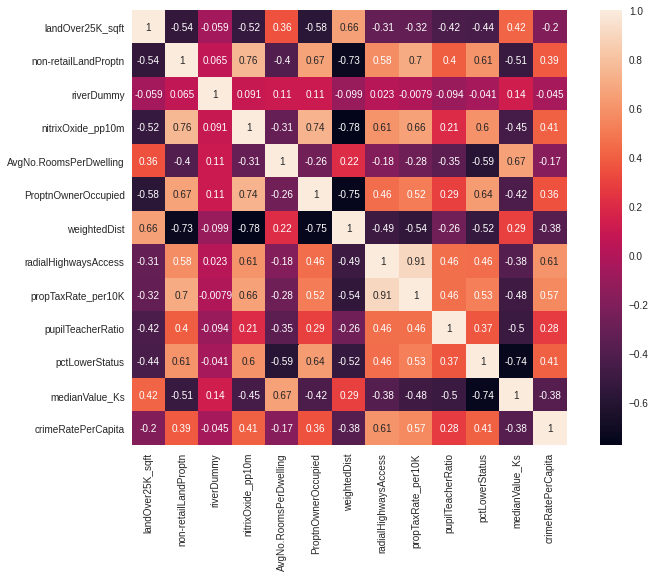

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
sns.heatmap(train_data.corr(method = 'pearson'), square = True, ax = ax, annot = True)
plt.show()

In [ ]:
train_data.columns

Index(['landOver25K_sqft', 'non-retailLandProptn', 'riverDummy',
       'nitrixOxide_pp10m', 'AvgNo.RoomsPerDwelling', 'ProptnOwnerOccupied',
       'weightedDist', 'radialHighwaysAccess', 'propTaxRate_per10K',
       'pupilTeacherRatio', 'pctLowerStatus', 'medianValue_Ks',
       'crimeRatePerCapita'],
      dtype='object')

In [ ]:
model = smf.ols(formula = 'np.log(crimeRatePerCapita) ~ nitrixOxide_pp10m + radialHighwaysAccess + propTaxRate_per10K +pctLowerStatus', data = train_data)
modelResult = model.fit()
print(modelResult.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(crimeRatePerCapita)   R-squared:                       0.853
Model:                                    OLS   Adj. R-squared:                  0.851
Method:                         Least Squares   F-statistic:                     504.6
Date:                        Thu, 23 Jul 2020   Prob (F-statistic):          1.22e-143
Time:                                14:38:11   Log-Likelihood:                -436.89
No. Observations:                         354   AIC:                             883.8
Df Residuals:                             349   BIC:                             903.1
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------